In [8]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

#
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Importing the self-written modules
from modules.data_simulation import InitialData

# Get a dataset with some combination of player cards and choosed challenge card with all 
# characteeristics and simulated answer if trying this challenge worth it or not.
# For details about simulation - module data_simulation - Turn - simulate_turn
data = InitialData()
turns = data.define_turns(4000, if_target=True)

In [3]:
turns.head()

,Игрок,Происхождение,Руна_1,Руна_2,Стремление,Опция,Судьба,Цель_1,Цель_2,Цель_3,Опыт,Доп. способность,Испытание,Основная руна,Дополнительная руна,Сложность,Стоит ли пробовать
0,10660,Новобранец,Сила,Телосложение,Поклявшийся защишать,Телосложение,Великий завоеватель,Сила,Ловкость,Телосложение,0,Ловкость,Найти пропавшее дитя,Мудрость,Сила,4,0
1,9288,Моряк,Сила,Интеллект,Избранник света,Нет,Коварный злодей,Сила,Ловкость,Интеллект,2,Нет,Стать завзятым бойцом,Сила,Ловкость,4,0
2,3290,Музыкант,Обаяние,Телосложение,Связанный честью,Нет,Народный заступник,Сила,Мудрость,Нет,0,Телосложение,Склонность к светлой магии,Интеллект,Обаяние,4,0
3,1498,Послушник,Мудрость,Обаяние,Прирожденный лидер,Обаяние,Великий завоеватель,Сила,Ловкость,Телосложение,0,Мудрость,Усмирить грабителя,Обаяние,Телосложение,3,0
4,8634,Моряк,Сила,Интеллект,Ученик мастера,Сила,Коварный злодей,Сила,Ловкость,Интеллект,1,Сила,Заручиться защитой духа,Обаяние,Мудрость,4,0


<Axes: xlabel='Стоит ли пробовать', ylabel='count'>

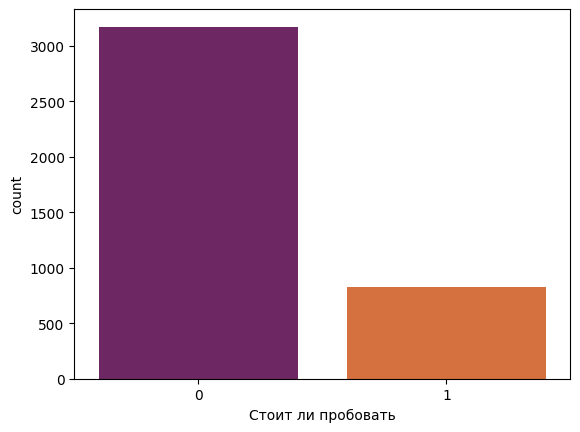

In [5]:
# Guess that we deal with unbalanced data - That's true! 
sns.countplot(data=turns, x='Стоит ли пробовать', palette='inferno') 

In [6]:
turns[turns['Стоит ли пробовать'] == 1][:10]

,Игрок,Происхождение,Руна_1,Руна_2,Стремление,Опция,Судьба,Цель_1,Цель_2,Цель_3,Опыт,Доп. способность,Испытание,Основная руна,Дополнительная руна,Сложность,Стоит ли пробовать
6,6332,Школяр,Мудрость,Интеллект,Сорвиголова,Ловкость,Драконорожденный,Телосложение,Обаяние,Нет,2,Мудрость,Изгнать призрака,Мудрость,Обаяние,3,1
9,13702,Воришка,Ловкость,Телосложение,Связанный честью,Нет,Бесстрашный первооткрыватель,Телосложение,Интеллект,Нет,2,Телосложение,Скрыться от преследователей,Ловкость,Мудрость,3,1
11,13842,Воришка,Ловкость,Телосложение,Избранник света,Нет,Дитя природы,Мудрость,Сила,Обаяние,1,Мудрость,Отыскать место силы,Мудрость,Ловкость,4,1
15,12993,Воришка,Ловкость,Телосложение,Поклявшийся защишать,Телосложение,Великий завоеватель,Сила,Ловкость,Телосложение,2,Сила,Отправиться на поиски еды,Телосложение,Ловкость,4,1
18,15123,Охотник,Мудрость,Ловкость,В поисках истины,Мудрость,Бесстрашный первооткрыватель,Телосложение,Интеллект,Нет,2,Нет,Выжить в огне,Телосложение,Мудрость,3,1
26,3227,Музыкант,Обаяние,Телосложение,Связанный честью,Нет,Драконорожденный,Телосложение,Обаяние,Нет,0,Телосложение,Усмирить грабителя,Обаяние,Телосложение,3,1
27,8255,Моряк,Сила,Интеллект,В поисках истины,Мудрость,Коварный злодей,Сила,Ловкость,Интеллект,2,Интеллект,Склонность к светлой магии,Интеллект,Обаяние,4,1
29,12343,Фермер,Сила,Мудрость,Жаждущий знаний,Интеллект,Великий завоеватель,Сила,Ловкость,Телосложение,1,Ловкость,Стать завзятым бойцом,Сила,Ловкость,4,1
33,4846,Подмастерье,Ловкость,Интеллект,Поклявшийся защишать,Телосложение,Народный заступник,Сила,Мудрость,Нет,1,Нет,Скрыться от преследователей,Ловкость,Мудрость,3,1
37,6950,Школяр,Мудрость,Интеллект,Избранник света,Нет,Коварный злодей,Сила,Ловкость,Интеллект,0,Интеллект,Скрыться от преследователей,Ловкость,Мудрость,3,1


In [7]:
print(turns.dtypes)

Игрок                   int64
Происхождение          object
Руна_1                 object
Руна_2                 object
Стремление             object
Опция                  object
Судьба                 object
Цель_1                 object
Цель_2                 object
Цель_3                 object
Опыт                    int64
Доп. способность       object
Испытание              object
Основная руна          object
Дополнительная руна    object
Сложность               int64
Стоит ли пробовать      int64
dtype: object


In [9]:
categorical_features_indices = np.where(turns.dtypes != float)[0]

In [10]:
drops = ["Игрок", "Испытание", "Стоит ли пробовать", "Происхождение", "Стремление", "Судьба"]

In [11]:
for i in ["Опыт", "Сложность","Стоит ли пробовать"]:
    turns[i] = turns[i].astype(int)
    
X = turns.drop(drops, axis=1)
y = turns["Стоит ли пробовать"]

In [18]:
categorical_features_indices = np.where(X.dtypes != float)[0]

In [15]:
X_trains, X_test, y_trains, y_test= train_test_split(X, y, test_size=0.10, random_state=101)

In [16]:
X_train, X_validation, y_train, y_validation = train_test_split(X_trains, y_trains, test_size=0.20, random_state=101)

In [71]:
model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric= 'F1',
    auto_class_weights='Balanced',
    logging_level='Silent'
)

In [63]:
%%html
<style>
.catboost {
    filter: invert(1);
    color: black;
    background-color: white;
}

# .catboost .main-svg {
#     filter: invert(1);
# }

# .catboost .legend_text {
#     filter: invert(1);
# }
</style>

In [72]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.041151
0:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 22.3ms	remaining: 22.3s
1:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 51.1ms	remaining: 25.5s
2:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 87.2ms	remaining: 29s
3:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 120ms	remaining: 30s
4:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 162ms	remaining: 32.3s
5:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 184ms	remaining: 30.5s
6:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 206ms	remaining: 29.2s
7:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 253ms	remaining: 31.4s
8:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 275ms	remaining: 30.3s
9:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 316ms	remaining: 31.3s
10:	learn: 0.6462700	test: 0.6918621	best: 0.6918621 (0)	total: 360ms	remaining: 32.4s
11:	learn: 0.6462700	tes

In [73]:
cv_params = model.get_params()

cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [66]:
cv_data

,iterations,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.651476,0.021611,0.652300,0.010574,0.680127,0.001351,0.680017,0.001685
1,1,0.651476,0.021611,0.651534,0.010782,0.666637,0.001306,0.666451,0.002561
2,2,0.651476,0.021611,0.652430,0.010775,0.654991,0.002867,0.654730,0.003471
3,3,0.651476,0.021611,0.651976,0.011443,0.643323,0.002902,0.643072,0.004301
4,4,0.651476,0.021611,0.652430,0.010775,0.632588,0.003023,0.632183,0.005031
...,...,...,...,...,...,...,...,...,...
995,995,0.909255,0.007377,0.990893,0.001220,0.214413,0.022506,0.085226,0.000873
996,996,0.909255,0.007377,0.990893,0.001220,0.214411,0.022527,0.085151,0.000817
997,997,0.909402,0.007151,0.990893,0.001220,0.214372,0.022447,0.085037,0.000875
998,998,0.909255,0.007377,0.990893,0.001220,0.214375,0.022475,0.084954,0.000922


In [67]:
print('Best validation f1 score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-F1-mean']),
    cv_data['test-F1-std'][np.argmax(cv_data['test-F1-mean'])],
    np.argmax(cv_data['test-F1-mean'])
))

Best validation f1 score: 0.91±0.00 on step 703


In [69]:
print(f"Precise validation f1 score: {np.max(cv_data['test-F1-mean'])}")

Precise validation f1 score: 0.9129257188372578


In [70]:
predictions = model.predict(X_test)
predictions_probs = model.predict_proba(X_test)
print(predictions[:10])
print(predictions_probs[:10])

[0 1 1 0 0 0 0 1 0 0]
[[0.9767446  0.0232554 ]
 [0.02496836 0.97503164]
 [0.48751352 0.51248648]
 [0.61051526 0.38948474]
 [0.62561472 0.37438528]
 [0.84469198 0.15530802]
 [0.83171613 0.16828387]
 [0.41444924 0.58555076]
 [0.812575   0.187425  ]
 [0.99261392 0.00738608]]


In [84]:
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': metrics.F1(),
    'logging_level': 'Silent',
    'use_best_model': False,
    'loss_function': 'Logloss',
    'auto_class_weights': 'Balanced'
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

In [85]:
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);

print('Simple model validation f1: {:.4}'.format(
    f1_score(y_validation, model.predict(X_validation))
))
print('')

print('Best model validation f1: {:.4}'.format(
    f1_score(y_validation, best_model.predict(X_validation))
))

Simple model validation f1: 0.869

Best model validation f1: 0.8642


In [86]:
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': metrics.F1(),
    'logging_level': 'Silent',
    'use_best_model': True,
    'od_type': 'Iter',
    'od_wait': 50,
    'loss_function': 'Logloss',
    'auto_class_weights': 'Balanced'
}

earlystop_model = CatBoostClassifier(**best_model_params)
earlystop_model.fit(train_pool, eval_set=validate_pool);

In [87]:
print(f'Simple model tree count: {model.tree_count_}')
print('Simple model validation accuracy: {:.4}'.format(
    f1_score(y_validation, model.predict(X_validation))
))
print('')

print(f'Early-stopped model tree count: {earlystop_model.tree_count_}')
print('Early-stopped model validation accuracy: {:.4}'.format(
    f1_score(y_validation, earlystop_model.predict(X_validation))
))

Simple model tree count: 500
Simple model validation accuracy: 0.869

Early-stopped model tree count: 284
Early-stopped model validation accuracy: 0.8642


In [88]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

Основная руна: 19.39251129406182
Опыт: 14.133585101762845
Сложность: 13.93115565344658
Дополнительная руна: 12.213961998744994
Доп. способность: 9.73127347361192
Руна_2: 8.089521148884943
Руна_1: 7.63478980388328
Цель_2: 5.677004314061342
Опция: 3.5999003691118934
Цель_1: 3.013704710063085
Цель_3: 2.5825921323672554


In [89]:
eval_metrics = earlystop_model.eval_metrics(validate_pool, [metrics.AUC()], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [90]:
model1 = CatBoostClassifier(iterations=100, depth=1, train_dir='model_depth_1/', logging_level='Silent')
model1.fit(train_pool, eval_set=validate_pool)
model2 = CatBoostClassifier(iterations=100, depth=5, train_dir='model_depth_5/', logging_level='Silent')
model2.fit(train_pool, eval_set=validate_pool);

In [91]:
from catboost import MetricVisualizer
widget = MetricVisualizer(['model_depth_1', 'model_depth_5'])
widget.start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [95]:
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric=metrics.F1(),
        verbose=False,
        loss_function=metrics.Logloss(),
        auto_class_weights='Balanced'
    )
    
    cv_data = cv(
        Pool(X, y, cat_features=categorical_features_indices),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-F1-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [96]:
from numpy.random import default_rng

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=default_rng(123)
)

print(best)

100%|██████████| 50/50 [56:34<00:00, 67.90s/trial, best loss: 0.08927869818738365]
{'l2_leaf_reg': 2.0, 'learning_rate': 0.08656401643855563}


In [97]:
model = CatBoostClassifier(
        l2_leaf_reg=int(best['l2_leaf_reg']),
        learning_rate=best['learning_rate'],
        iterations=500,
        eval_metric=metrics.F1(),
        verbose=False,
        loss_function=metrics.Logloss(),
        auto_class_weights='Balanced'
    )

cv_data = cv(Pool(X, y, cat_features=categorical_features_indices), model.get_params())

Training on fold [0/3]

bestTest = 0.9144212345
bestIteration = 125

Training on fold [1/3]

bestTest = 0.9281763734
bestIteration = 199

Training on fold [2/3]

bestTest = 0.8991731517
bestIteration = 266



In [98]:
print('Precise validation f1 score: {}'.format(np.max(cv_data['test-F1-mean'])))

Precise validation f1 score: 0.9107213018126163
